# Taller Machine Learning
___________________________________

### Carolina Tovar Castiblanco

In [1]:
import tensorflow as tf
from tensorflow import keras


import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from pathlib import Path
current_dir = Path('.').resolve()
project_dir = current_dir.parent

from pandas_profiling import ProfileReport

print(current_dir)
print(project_dir)

2022-06-11 10:01:30.918670: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-11 10:01:30.918725: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


/home/jupyter/ESEIT_BigData/notebooks
/home/jupyter/ESEIT_BigData


In [2]:
file_data = os.path.join(project_dir, 'data', 'raw', 'Housing.csv')
data = pd.read_csv(file_data, header=0)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Exploratory Data Analysis EDA

In [3]:
target = 'price'

furnishng = ['furnishingstatus']
num_cols = ['area']
ord_cols = ['bedrooms', 'bathrooms', 'stories']
cat_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
            'airconditioning', 'parking', 'prefarea']
cat_cols

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea']

<AxesSubplot:xlabel='furnishingstatus', ylabel='price'>

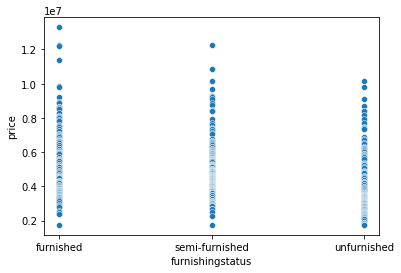

In [4]:
sns.scatterplot(x='furnishingstatus', y='price', data=data)

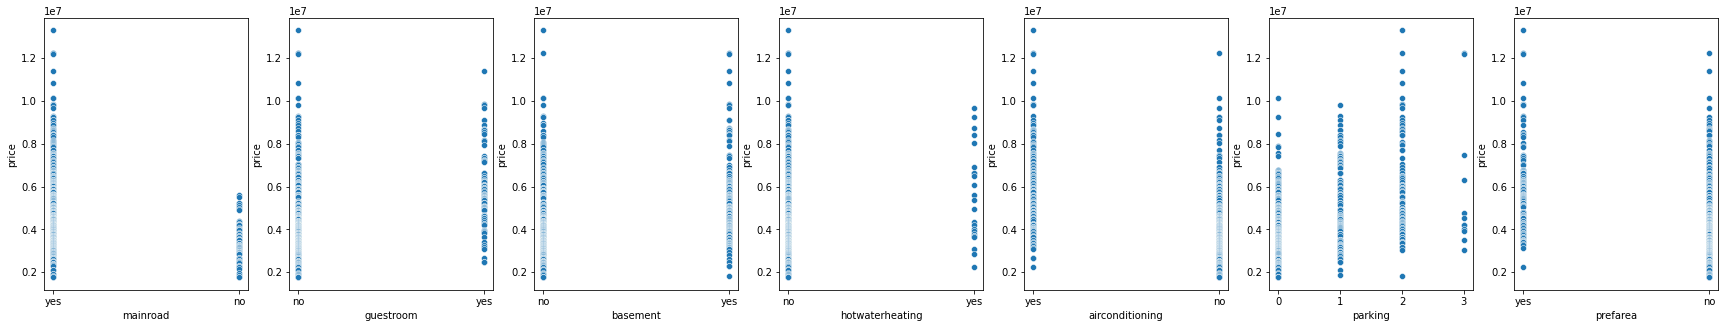

In [5]:
fig, axes = plt.subplots(ncols=7, nrows=1, figsize=(30, 5) )
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.scatterplot(x=col, y='price', data=data, ax=axes[i])

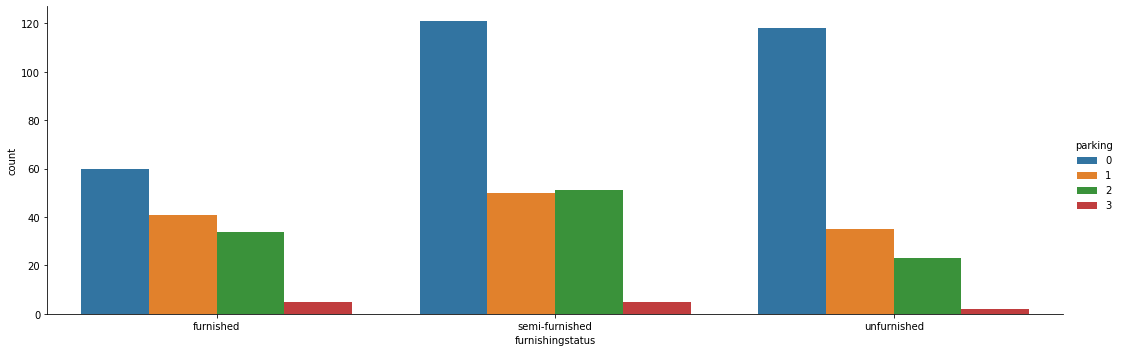

In [6]:
sns.catplot(x='furnishingstatus', data=data, kind='count', hue='parking', aspect=3)

## Feature Engineering

- Converting Numeric cols to categorical cols
- New variables
- One-hot enconder

In [7]:
data['area'].quantile([0.20,0.4,0.6,0.8]) # Lista de los cortes que quiero hacer

0.2    3450.0
0.4    4065.0
0.6    5400.0
0.8    6600.0
Name: area, dtype: float64

In [8]:
data["area_cat"] = pd.cut(data["area"],
                               bins=[0., 3450, 4065, 5400, 6600, np.inf],
                               labels=[1, 2, 3, 4, 5])

data["area_cat"].value_counts()

1    112
3    112
5    108
4    107
2    106
Name: area_cat, dtype: int64

In [9]:
corr_matrix =data.corr()
corr_matrix['price'].sort_values(ascending=False)

price        1.000000
area         0.535997
bathrooms    0.517545
stories      0.420712
parking      0.384394
bedrooms     0.366494
Name: price, dtype: float64

In [10]:
data["lux_home"] = data["bathrooms"] + data["bedrooms"] + data["parking"]
corr_matrix = data.corr()
corr_matrix["price"].sort_values(ascending=False)

price        1.000000
lux_home     0.588013
area         0.535997
bathrooms    0.517545
stories      0.420712
parking      0.384394
bedrooms     0.366494
Name: price, dtype: float64

In [11]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,area_cat,lux_home
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,5,8
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,5,11
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,5,7
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,5,9
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,1,5
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,1,4
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,2,3
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,1,4


<AxesSubplot:>

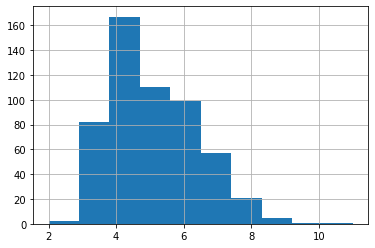

In [12]:
data['lux_home'].hist()

## One-Hot Enconder

In [13]:
data_dummies = pd.get_dummies(data[cat_cols])
data_dummies.head()

,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,2,0,1,1,0,1,0,1,0,0,1,0,1
1,3,0,1,1,0,1,0,1,0,0,1,1,0
2,2,0,1,1,0,0,1,1,0,1,0,0,1
3,3,0,1,1,0,0,1,1,0,0,1,0,1
4,2,0,1,0,1,0,1,1,0,0,1,1,0


In [14]:
data_ord = data['lux_home']
data_ord.head()

0     8
1    11
2     7
3     9
4     7
Name: lux_home, dtype: int64

In [15]:
list_df = [
    data[['price']], # doble corchete cuadrado para hacer un dataframe de un columna
    data_dummies,
    data_ord,
]

data_fe = pd.concat(list_df, axis=1)
data_fe.shape

(545, 15)

In [16]:
data_fe

,price,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,lux_home
0,13300000,2,0,1,1,0,1,0,1,0,0,1,0,1,8
1,12250000,3,0,1,1,0,1,0,1,0,0,1,1,0,11
2,12250000,2,0,1,1,0,0,1,1,0,1,0,0,1,7
3,12215000,3,0,1,1,0,0,1,1,0,0,1,0,1,9
4,11410000,2,0,1,0,1,0,1,1,0,0,1,1,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,2,0,1,1,0,0,1,1,0,1,0,1,0,5
541,1767150,0,1,0,1,0,1,0,1,0,1,0,1,0,4
542,1750000,0,0,1,1,0,1,0,1,0,1,0,1,0,3
543,1750000,0,1,0,1,0,1,0,1,0,1,0,1,0,4


## Train Model

In [17]:
from sklearn.model_selection import train_test_split

cols = data_fe.columns
X = data_fe[[col for col in cols if col != 'price']]
y = data['price']/1.0e6

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [18]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()


lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

Lasso()

In [19]:
y_pred_lr    = lr.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

## Gŕaficos residuales

Text(0.5, 0, 'Predictions')

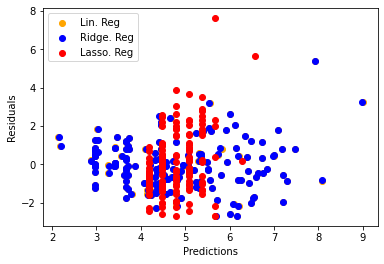

In [20]:
plt.scatter(y_pred_lr ,    y_test-y_pred_lr,    color='orange', label='Lin. Reg')
plt.scatter(y_pred_ridge , y_test-y_pred_ridge, color='blue',   label='Ridge. Reg')
plt.scatter(y_pred_lasso , y_test-y_pred_lasso, color='red',    label='Lasso. Reg')

plt.legend()

plt.ylabel('Residuals')
plt.xlabel('Predictions')

Text(0, 0.5, 'Frequency')

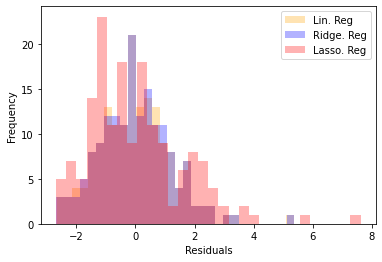

In [21]:
plt.hist(y_test-y_pred_lr,    bins=30, color='orange', label='Lin. Reg',   alpha=0.3)
plt.hist(y_test-y_pred_ridge, bins=30, color='blue',   label='Ridge. Reg', alpha=0.3)
plt.hist(y_test-y_pred_lasso, bins=30, color='red',    label='Lasso. Reg', alpha=0.3)

plt.legend()
plt.xlabel('Residuals')
plt.ylabel('Frequency')

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

print('Model', 'MSE', 'R2')
print('Lineal. Reg', mean_squared_error(y_test, y_pred_lr),    r2_score(y_test, y_pred_lr) )
print('Ridge.  Reg', mean_squared_error(y_test, y_pred_ridge), r2_score(y_test, y_pred_ridge) )
print('Lasso.  Reg', mean_squared_error(y_test, y_pred_lasso), r2_score(y_test, y_pred_lasso) )

Model MSE R2
Lineal. Reg 1.5401079080227007 0.5367070349199725
Ridge.  Reg 1.5403674420322648 0.5366289622860982
Lasso.  Reg 2.5852077332421137 0.22232166340911907


## QQ Plot

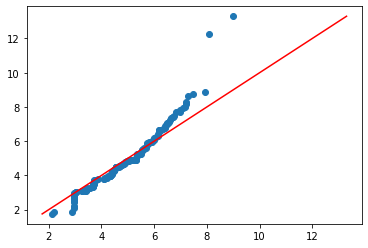

In [23]:
plt.scatter(np.sort(y_pred_lr), np.sort(y_test))
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], color='red')

# Redes Neuronales

## Data Transformation

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['mainroad_code']         = le.fit_transform(data['mainroad'])
data['guestroom_code']        = le.fit_transform(data['guestroom'])
data['basement_code']         = le.fit_transform(data['basement'])
data['hotwaterheating_code']  = le.fit_transform(data['hotwaterheating'])
data['airconditioning_code']  = le.fit_transform(data['airconditioning'])
data['parking_code']          = le.fit_transform(data['parking'])
data['prefarea_code']         = le.fit_transform(data['prefarea'])
data['furnishingstatus_code'] = le.fit_transform(data['furnishingstatus'])

data['log_area']       = np.log(data['area'] + 0.1)
data['log_bedrooms']   = np.log(data['bedrooms'] + 0.1)
data['log_bathrooms']  = np.log(data['bathrooms'] + 0.1)
data['log_stories']    = np.log(data['stories'] + 0.1)


#data['log_price'] = np.log(data['price'] + 0.1)

In [25]:
data=data.drop(['area_cat','lux_home','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus','area','bedrooms','bathrooms', 'stories'],axis=1)
data.head()

,price,mainroad_code,guestroom_code,basement_code,hotwaterheating_code,airconditioning_code,parking_code,prefarea_code,furnishingstatus_code,log_area,log_bedrooms,log_bathrooms,log_stories
0,13300000,1,0,0,0,1,2,1,0,8.911948,1.410987,0.741937,1.131402
1,12250000,1,0,0,0,1,3,0,0,9.100537,1.410987,1.410987,1.410987
2,12250000,1,0,1,0,0,2,1,1,9.206342,1.131402,0.741937,0.741937
3,12215000,1,0,1,0,1,3,1,0,8.922672,1.410987,0.741937,0.741937
4,11410000,1,1,1,0,1,2,0,0,8.911948,1.410987,0.095310,0.741937


In [26]:
data.fillna(0, inplace=True)
data.isna().sum()

price                    0
mainroad_code            0
guestroom_code           0
basement_code            0
hotwaterheating_code     0
airconditioning_code     0
parking_code             0
prefarea_code            0
furnishingstatus_code    0
log_area                 0
log_bedrooms             0
log_bathrooms            0
log_stories              0
dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

y = data['furnishingstatus_code'].values
X = data.drop('furnishingstatus_code', axis=1).values

print('X shape', X.shape)
print('y shape', y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


print('X Test shape',X_test.shape)
print('X Test shape',y_test.shape)

print('X train shape',X_train.shape)
print('X train shape',y_train.shape)

X shape (545, 12)
y shape (545,)
X Test shape (164, 12)
X Test shape (164,)
X train shape (381, 12)
X train shape (381,)


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

In [29]:
model = keras.models.Sequential([
    keras.layers.Dense(5, input_shape=(X_train.shape[1],), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

2022-06-11 10:01:38.555926: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-11 10:01:38.555971: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-11 10:01:38.556005: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ctovar-espbigdata): /proc/driver/nvidia/version does not exist
2022-06-11 10:01:38.556389: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 65        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 71
Trainable params: 71
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics  = ['accuracy']
)

In [32]:
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    validation_data=(X_test, y_test)
)

Epoch 1/30
12/12 [==============================] - 1s 17ms/step - loss: 0.9167 - accuracy: 0.2625 - val_loss: 0.8933 - val_accuracy: 0.3659
Epoch 2/30
12/12 [==============================] - 0s 4ms/step - loss: 0.8701 - accuracy: 0.2835 - val_loss: 0.8528 - val_accuracy: 0.3598
Epoch 3/30
12/12 [==============================] - 0s 4ms/step - loss: 0.8283 - accuracy: 0.2966 - val_loss: 0.8133 - val_accuracy: 0.3415
Epoch 4/30
12/12 [==============================] - 0s 4ms/step - loss: 0.7881 - accuracy: 0.2835 - val_loss: 0.7766 - val_accuracy: 0.3720
Epoch 5/30
12/12 [==============================] - 0s 4ms/step - loss: 0.7487 - accuracy: 0.3150 - val_loss: 0.7437 - val_accuracy: 0.4024
Epoch 6/30
12/12 [==============================] - 0s 4ms/step - loss: 0.7135 - accuracy: 0.3307 - val_loss: 0.7098 - val_accuracy: 0.4268
Epoch 7/30
12/12 [==============================] - 0s 4ms/step - loss: 0.6780 - accuracy: 0.3386 - val_loss: 0.6788 - val_accuracy: 0.4207
Epoch 8/30
12/12 [=

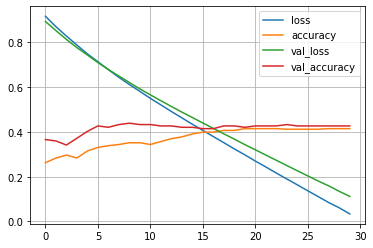

In [33]:
pd.DataFrame(history.history).plot()
plt.grid()

In [34]:
y_pred = model.predict(X_test)

6/6 [==============================] - 0s 1ms/step


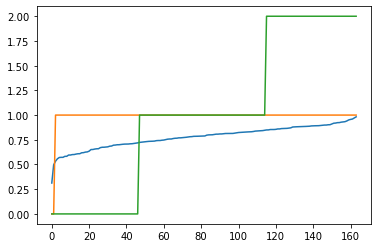

In [35]:
plt.plot(np.sort(y_pred.flatten()))
plt.plot(np.sort(np.round(y_pred.flatten())))
plt.plot(np.sort(y_test.flatten())) 

In [36]:
y_pred_round = np.round(y_pred.flatten())

In [37]:
y_pred_round

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

<AxesSubplot:>

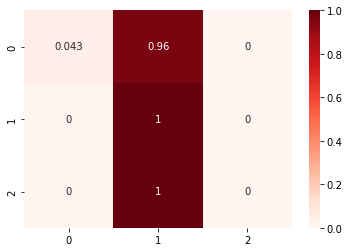

In [38]:
from sklearn.metrics import confusion_matrix

sns.heatmap(
    confusion_matrix(y_test, y_pred_round, normalize='true'),
    annot=True,
    cmap='Reds'
)

In [39]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(
    class_weight = "balanced",
    classes= np.unique(y_train),
    y= y_train
)

class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

{0: 1.3655913978494623, 1: 0.7987421383647799, 2: 0.9844961240310077}

In [40]:
model_cw= keras.models.Sequential([
    keras.layers.Dense(10,input_shape=(X_train.shape[1],),activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model_cw.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics  = ['accuracy']
)

history = model_cw.fit(
    X_train,
    y_train,
    # batch_size=
    epochs=30,
    validation_data=(X_test, y_test),
    class_weight=class_weights
)

Epoch 1/30
12/12 [==============================] - 1s 35ms/step - loss: 0.6194 - accuracy: 0.3753 - val_loss: 0.5494 - val_accuracy: 0.3171
Epoch 2/30
12/12 [==============================] - 0s 4ms/step - loss: 0.5679 - accuracy: 0.3780 - val_loss: 0.4921 - val_accuracy: 0.3232
Epoch 3/30
12/12 [==============================] - 0s 4ms/step - loss: 0.5161 - accuracy: 0.3780 - val_loss: 0.4419 - val_accuracy: 0.3232
Epoch 4/30
12/12 [==============================] - 0s 4ms/step - loss: 0.4695 - accuracy: 0.3727 - val_loss: 0.3976 - val_accuracy: 0.3354
Epoch 5/30
12/12 [==============================] - 0s 4ms/step - loss: 0.4286 - accuracy: 0.3806 - val_loss: 0.3532 - val_accuracy: 0.3598
Epoch 6/30
12/12 [==============================] - 0s 4ms/step - loss: 0.3880 - accuracy: 0.3753 - val_loss: 0.3136 - val_accuracy: 0.3598
Epoch 7/30
12/12 [==============================] - 0s 4ms/step - loss: 0.3522 - accuracy: 0.3780 - val_loss: 0.2730 - val_accuracy: 0.3902
Epoch 8/30
12/12 [=

6/6 [==============================] - 0s 1ms/step


<AxesSubplot:>

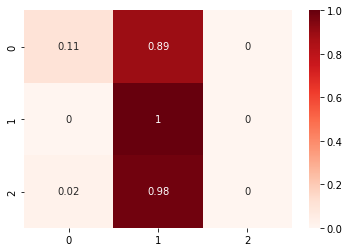

In [41]:
y_pred = model_cw.predict(X_test)
y_pred_round = np.round(y_pred.flatten())

from sklearn.metrics import confusion_matrix

sns.heatmap(
    confusion_matrix(y_test, y_pred_round, normalize='true'),
    annot=True,
    cmap='Reds'
)